# **PERCENTILE METHOD**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('weight-height.csv')

In [10]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [11]:
df.shape

(10000, 3)

In [12]:
df['Height'].describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


<ipython-input-14-786bcb09b754>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'],hist=False)


<Axes: xlabel='Height', ylabel='Density'>

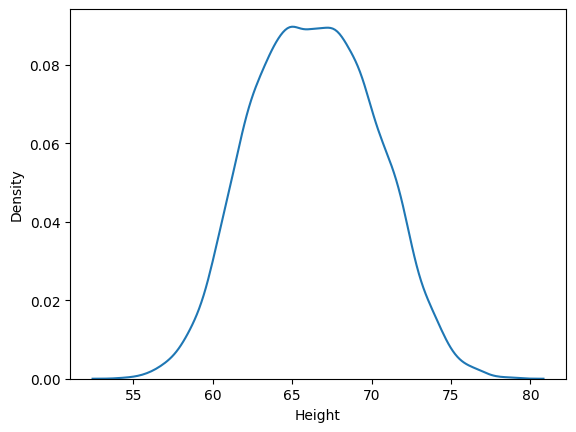

In [14]:
sns.distplot(df['Height'],hist=False)

Normally distributed chat

<Axes: xlabel='Height'>

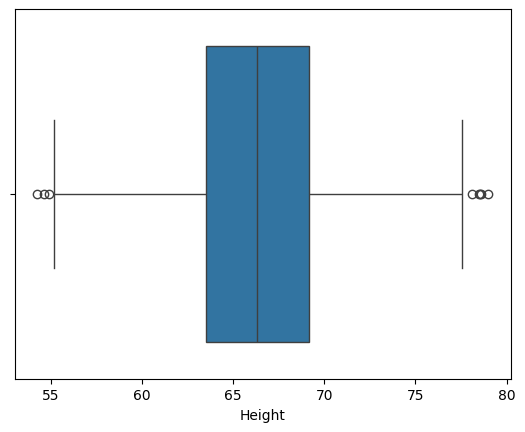

In [15]:
sns.boxplot(x = df['Height'])

We have some outliers on both the sides

In [18]:
upper_limit = df['Height'].quantile(0.99) # 99 percentile
lower_limit = df['Height'].quantile(0.01) # 1 percentile
# The Percentile range must be same like 1 percentile is taken as upper limit
# then lower limit will also have 1 percentile and not more than that

In [19]:
print('Upper_limit = ',upper_limit)
print('Lower_limit = ',lower_limit)

Upper_limit =  74.7857900583366
Lower_limit =  58.13441158671655


In [21]:
df[(df['Height'] >= upper_limit) | (df['Height'] <= lower_limit)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


# **Trimming**

In [22]:
new_df = df[(df['Height'] <= upper_limit) & (df['Height'] >= lower_limit)]

In [23]:
new_df.shape

(9800, 3)

In [26]:
new_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<ipython-input-27-851bd8da75c7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Height'],hist=False)


<Axes: xlabel='Height', ylabel='Density'>

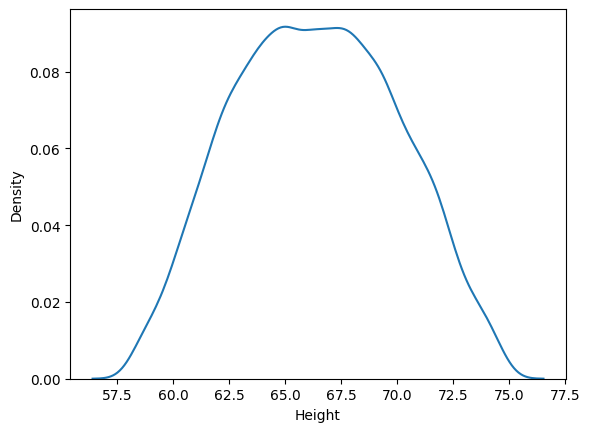

In [27]:
sns.distplot(new_df['Height'],hist=False)

<Axes: xlabel='Height'>

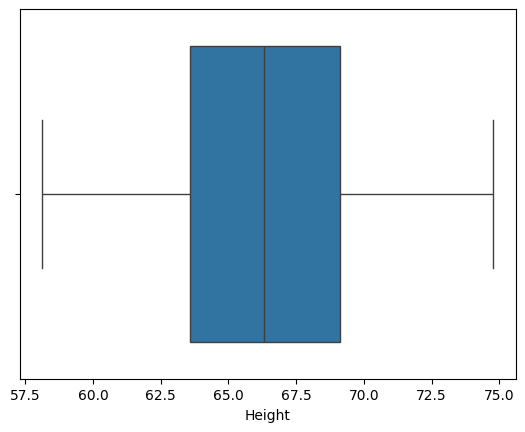

In [29]:
sns.boxplot(x=new_df['Height'])

# **Capping**

In [31]:
df['Height'] = np.where(df['Height']>=upper_limit,upper_limit,
                        np.where(df['Height']<=lower_limit,lower_limit,
                                df['Height'])
                        )

In [32]:
df['Height'].describe()

,Height
count,10000.000000
mean,66.366281
std,3.795717
min,58.134412
25%,63.505620
50%,66.318070
75%,69.174262
max,74.785790


<ipython-input-33-786bcb09b754>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'],hist=False)


<Axes: xlabel='Height', ylabel='Density'>

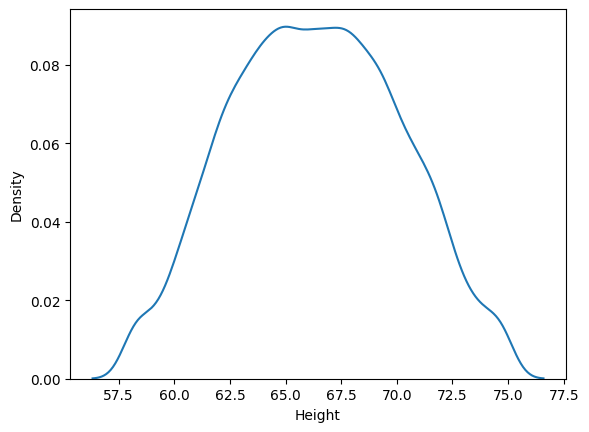

In [33]:
sns.distplot(df['Height'],hist=False)

<Axes: xlabel='Height'>

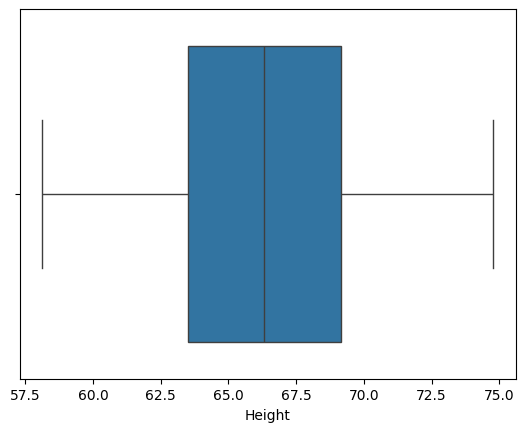

In [35]:
sns.boxplot(x=df['Height'])